In [2]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv(r'D:\UKM\Research Assistant\Projek2Data\IndoorMovement\dataset\New\AllData.csv', names=['RSS_anchor1','RSS_anchor2', 'RSS_anchor3', 'RSS_anchor4'], header=0)
df.head()

#Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.RSS_anchor4); axes[0, 0].set_title('Original Series')
plot_acf(df.RSS_anchor4, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.RSS_anchor4.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.RSS_anchor4.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.RSS_anchor4.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.RSS_anchor4.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\UKM\\Research Assistant\\Projek2Data\\IndoorMovement\\dataset\\New\\AllData.csv'

In [4]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat

#Testing newly added
split_point = len(df.RSS_anchor1) - 2640
dataset, validation = df.RSS_anchor1[0:split_point], df.RSS_anchor1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
X = df.RSS_anchor4
# print(X)
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    ar_coef = model_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test.values[t]
    history.append(obs)
#     print(test.values)
#     print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
print('Test: ' % len(test))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

Dataset 10557, Validation 2640


TypeError: not all arguments converted during string formatting

In [37]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.RSS_anchor4, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            RSS_anchor4   No. Observations:                13197
Model:                     ARMA(1, 0)   Log Likelihood                 603.917
Method:                       css-mle   S.D. of innovations              0.231
Date:                Mon, 03 May 2021   AIC                          -1201.833
Time:                        15:25:47   BIC                          -1179.370
Sample:                             0   HQIC                         -1194.333
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0755      0.013     -5.598      0.000      -0.102      -0.049
ar.L1.RSS_anchor4     0.8509      0.005    186.070      0.000       0.842       0.860
                        

In [47]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.RSS_anchor4, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.RSS_anchor4   No. Observations:                13196
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 955.883
Method:                       css-mle   S.D. of innovations              0.225
Date:                Mon, 03 May 2021   AIC                          -1903.765
Time:                        16:40:29   BIC                          -1873.815
Sample:                             1   HQIC                         -1893.765
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.776e-05      0.001     -0.135      0.893      -0.001       0.001
ar.L1.D.RSS_anchor4     0.5968      0.027     22.361      0.000       0.544       0.649
ma.L1.D.RSS_anch

In [7]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.RSS_anchor4, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.RSS_anchor4   No. Observations:                13196
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 955.883
Method:                       css-mle   S.D. of innovations              0.225
Date:                Mon, 03 May 2021   AIC                          -1903.765
Time:                        04:15:33   BIC                          -1873.815
Sample:                             1   HQIC                         -1893.765
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.776e-05      0.001     -0.135      0.893      -0.001       0.001
ar.L1.D.RSS_anchor4     0.5968      0.027     22.361      0.000       0.544       0.649
ma.L1.D.RSS_anch

# Combining all data into 1 file

In [9]:
import glob as glob
import pandas as pd
path =r'D:/UKM/Research Assistant/Projek2Data/IndoorMovement/dataset' 

group = glob.glob(path + "/*/*.csv") 

AllData = pd.DataFrame() 


data = [] 

for file_ in group: 
    df = pd.read_csv(file_,index_col=None, header=0) 
    data.append(df)    

AllData = pd.concat(data) 
# AllData.sort_values(by=['Group', 'Path'], inplace=True)
# AllData.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)
print(AllData)
# AllData

# frame1.to_csv("D:/UKM/Research Assistant/Projek2Data/IndoorMovement/dataset/Group1.csv")
# frame2.to_csv("D:/UKM/Research Assistant/Projek2Data/IndoorMovement/dataset/Group2.csv")
# frame3.to_csv("D:/UKM/Research Assistant/Projek2Data/IndoorMovement/dataset/Group3.csv")
# AllData.to_csv("D:/UKM/Research Assistant/Projek2Data/IndoorMovement/dataset/FinalizedDatasets.csv")

    #RSS_anchor1   RSS_anchor2   RSS_anchor3   RSS_anchor4
0       -0.90476      -0.48000       0.28571       0.30000
1       -0.57143      -0.32000       0.14286       0.30000
2       -0.38095      -0.28000      -0.14286       0.35000
3       -0.28571      -0.20000      -0.47619       0.35000
4       -0.14286      -0.20000       0.14286      -0.20000
..           ...           ...           ...           ...
40      -0.50000      -0.60000       0.73333       1.00000
41      -0.50000      -0.46667       0.73333       1.00000
42      -0.50000      -0.42222       0.73333       0.36170
43      -0.40909      -0.33333       0.55556      -0.31915
44      -0.45455      -0.46667       0.46667      -0.31915

[13197 rows x 4 columns]


In [34]:
AllData


,Group,Path,Class,RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,1,P1,1,-0.90476,-0.48000,0.28571,0.30000
1,1,P1,1,-0.57143,-0.32000,0.14286,0.30000
2,1,P1,1,-0.38095,-0.28000,-0.14286,0.35000
3,1,P1,1,-0.28571,-0.20000,-0.47619,0.35000
4,1,P1,1,-0.14286,-0.20000,0.14286,-0.20000
...,...,...,...,...,...,...,...
5365,3,P6,-1,-0.50000,-0.60000,0.73333,1.00000
5366,3,P6,-1,-0.50000,-0.46667,0.73333,1.00000
5367,3,P6,-1,-0.50000,-0.42222,0.73333,0.36170
5368,3,P6,-1,-0.40909,-0.33333,0.55556,-0.31915


# Data Processing

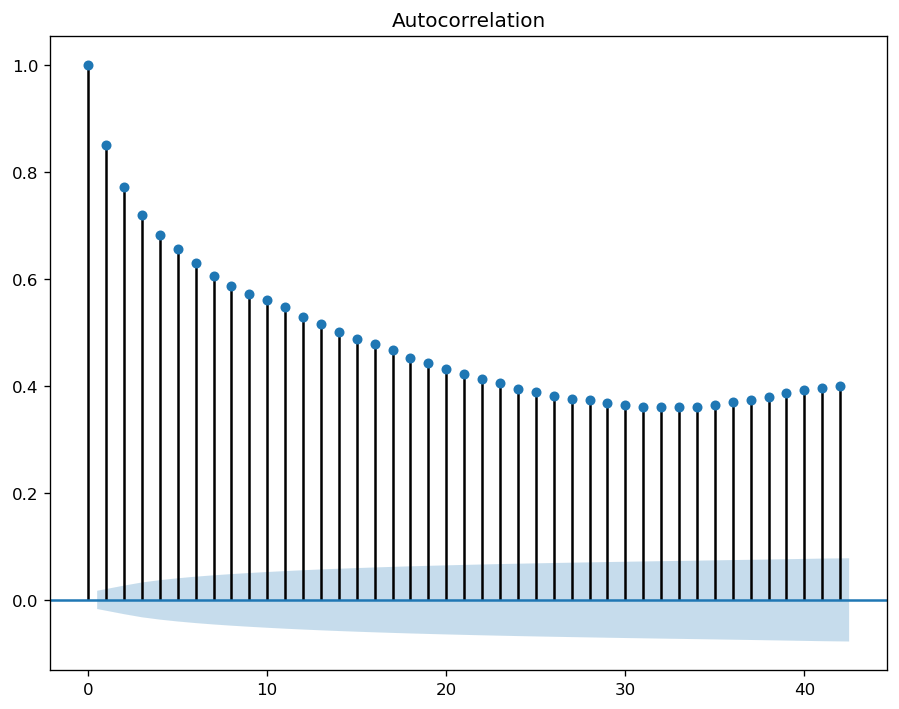

In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv(r'D:\UKM\Research Assistant\Projek2Data\IndoorMovement\tempDatasets\New\AllData.csv', names=['RSS_anchor1','RSS_anchor2', 'RSS_anchor3', 'RSS_anchor4'], header=0)
df.head()

#Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.RSS_anchor4); axes[0, 0].set_title('Original Series')
plot_acf(df.RSS_anchor4)
plt.show()

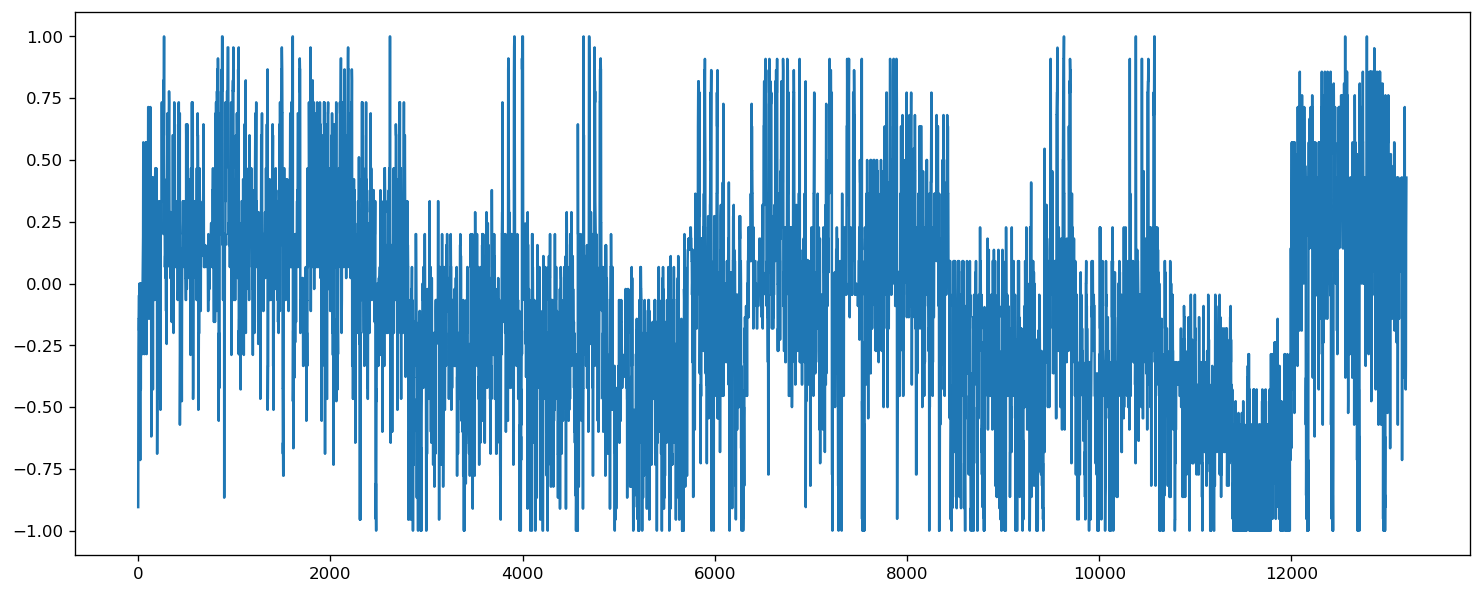

In [11]:
df.RSS_anchor1.plot(figsize=(15, 6))
plt.show()

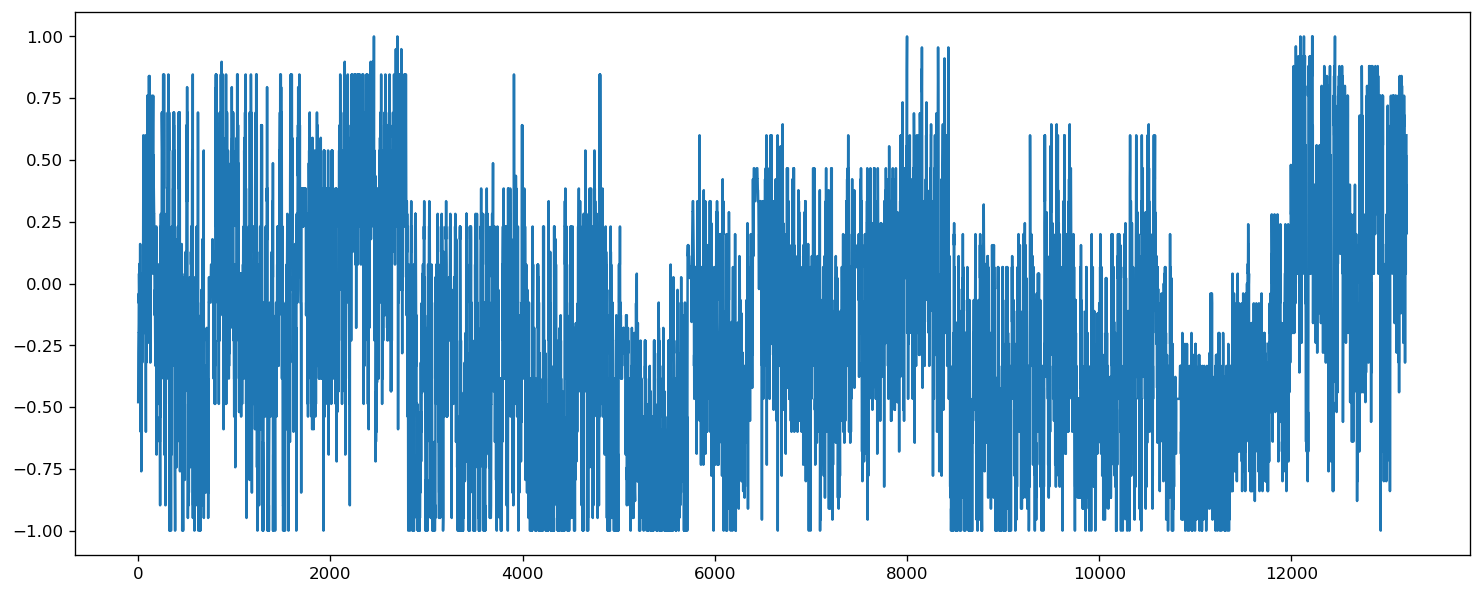

In [12]:
df.RSS_anchor2.plot(figsize=(15, 6))
plt.show()

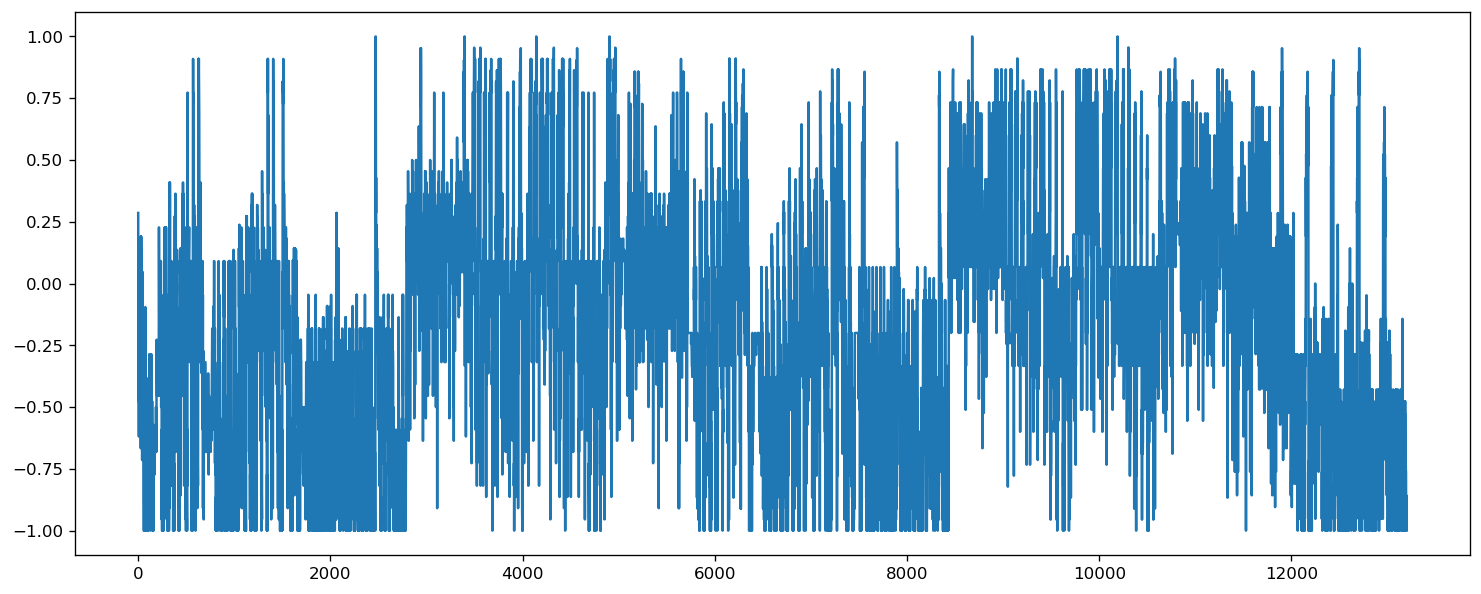

In [13]:
df.RSS_anchor3.plot(figsize=(15, 6))
plt.show()

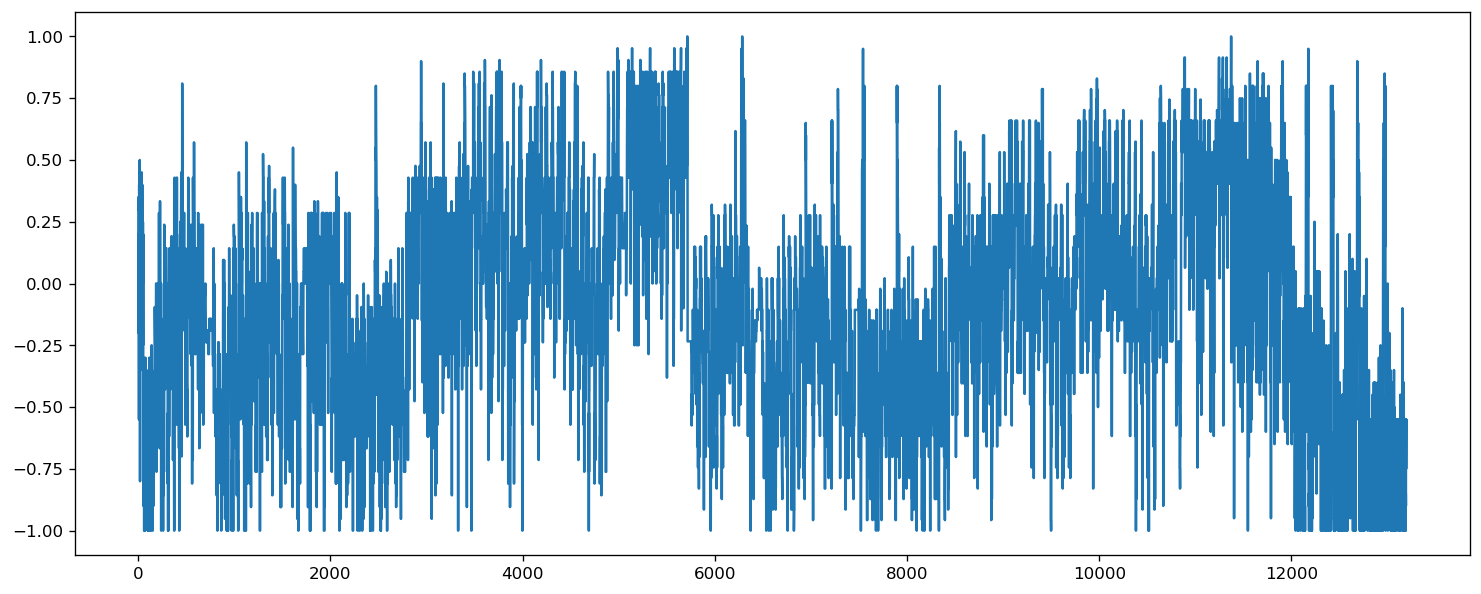

In [2]:
df.RSS_anchor4.plot(figsize=(15, 6))
plt.show()

In [2]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [3]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df.RSS_anchor4,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 2),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5843      0.009     62.861      0.000       0.566       0.603
ma.L1         -0.8969      0.006   -154.976      0.000      -0.908      -0.886
ar.S.L2        0.0308      0.009      3.613      0.000       0.014       0.048
ma.S.L2       -1.0000      0.025    -39.965      0.000      -1.049      -0.951
sigma2         0.0506      0.001     37.623      0.000       0.048       0.053


In [2]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.RSS_anchor4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16161.780025579701
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:13041.32108281625
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:14954.987267951263
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9926.046264037017
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11552.912177595135
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9838.247481428205
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13129.030992105623
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9532.614530412273
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7434.273439455257
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5865.416746977964
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9710.370953521564
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3496.2006389707794
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5203.018272249696
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3427.85162293685
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7247.419402462423
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3342.711966780763
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-183.42315150914885
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-203.42455189935663
AR

In [3]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df.RSS_anchor4,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5806      0.010     59.012      0.000       0.561       0.600
ma.L1         -0.8846      0.006   -136.863      0.000      -0.897      -0.872
ar.S.L12      -0.0205      0.009     -2.416      0.016      -0.037      -0.004
ma.S.L12      -1.0000      0.408     -2.453      0.014      -1.799      -0.201
sigma2         0.0506      0.021      2.452      0.014       0.010       0.091


In [15]:
import pmdarima as pm
model = pm.auto_arima(df.RSS_anchor4, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) 

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1716.316, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16162.456, Time=0.50 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1173.423, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7434.246, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2028.593, Time=2.48 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1571.476, Time=1.97 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-2037.229, Time=3.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1741.755, Time=1.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-2025.901, Time=3.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2094.172, Time=5.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1910.735, Time=1.86 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-2152.908, Time=6.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1984.414, Time=2.27 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=6.73 sec
 ARIMA(2,0,3)(0,0,0)[0] in

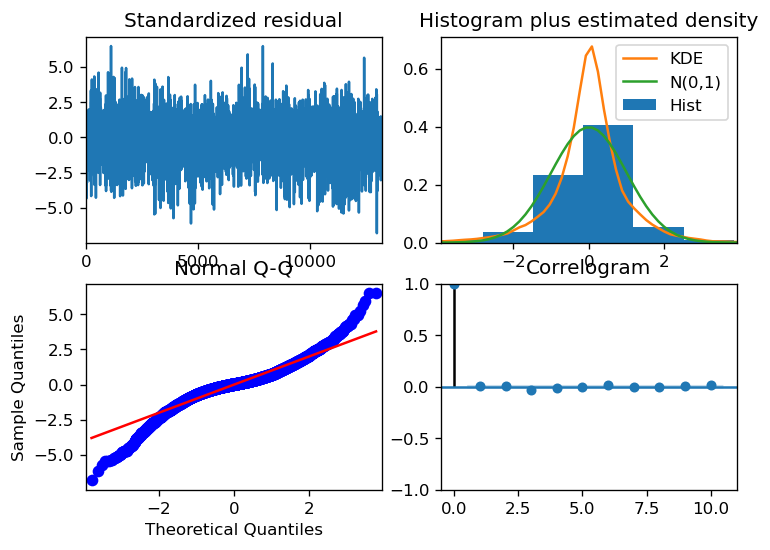

In [16]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-1917.644, Time=59.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-182.438, Time=2.29 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-915.875, Time=5.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1259.757, Time=10.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-184.437, Time=0.50 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-1919.167, Time=26426.10 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-1921.070, Time=22.45 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-1919.364, Time=84.68 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-2087.671, Time=27.60 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-2086.014, Time=45.80 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-2086.043, Time=47.70 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-2042.859, Time=72.84 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-1636.937, Time=5.17 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-1903.765, Time=11.30

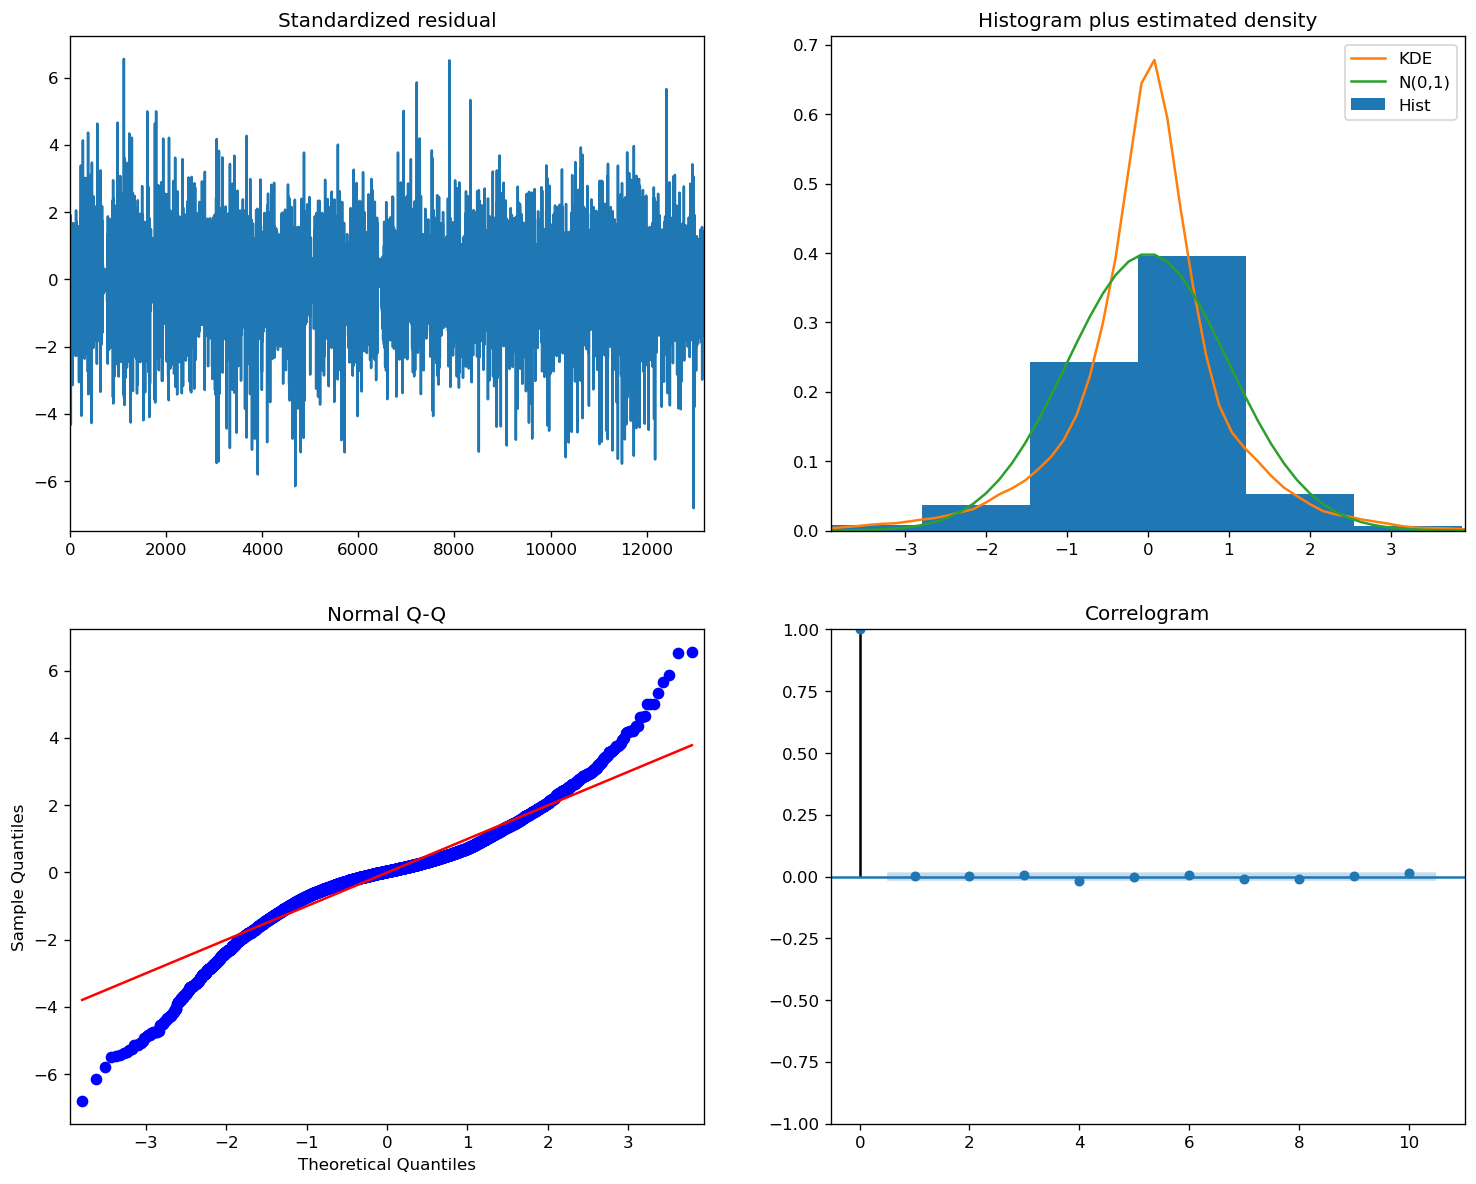

In [3]:
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt

df = df.dropna()

model = pm.auto_arima(df.RSS_anchor4, error_action='ignore', trace=1,
                      suppress_warnings=True,
                      seasonal=True, m=12)

model.plot_diagnostics(figsize=(15,12))
plt.show()

In [22]:
mod = sm.tsa.statespace.SARIMAX(df.RSS_anchor4,
                                order=(1, 1, 4),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
# (1,1,4)(0,0,0)[12] 
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8888      0.008    110.177      0.000       0.873       0.905
ma.L1         -1.2394      0.011   -116.941      0.000      -1.260      -1.219
ma.L2          0.1518      0.011     13.324      0.000       0.129       0.174
ma.L3          0.0486      0.013      3.878      0.000       0.024       0.073
ma.L4          0.0453      0.009      4.962      0.000       0.027       0.063
sigma2         0.0496      0.000    125.803      0.000       0.049       0.050


In [26]:
# one step forecast
yhat = results.predict(start=len(df.RSS_anchor4), end=len(df.RSS_anchor4))
yhat

13197   -0.628166
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

X = df.RSS_anchor4.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=0.097892, expected=-0.319150
predicted=-0.253288, expected=-0.319150
predicted=-0.254946, expected=-0.063830
predicted=-0.064324, expected=0.191490
predicted=0.127924, expected=0.191490
predicted=0.129528, expected=0.191490
predicted=0.131090, expected=0.191490
predicted=0.132611, expected=0.191490
predicted=0.134092, expected=0.191490
predicted=0.135534, expected=-0.106380
predicted=-0.087347, expected=-0.106380
predicted=-0.087821, expected=0.191490
predicted=0.135978, expected=0.191490
predicted=0.137374, expected=0.148940
predicted=0.106696, expected=-0.319150
predicted=-0.244642, expected=-0.319150
predicted=-0.246515, expected=-0.319150
predicted=-0.248339, expected=-0.063830
predicted=-0.057886, expected=-0.063830
predicted=-0.058033, expected=-0.063830
predicted=-0.058176, expected=-0.063830
predicted=-0.058316, expected=0.021277
predicted=0.005617, expected=0.276600
predicted=0.198230, expected=-0.106380
predicted=-0.088119, expected=-0.106380
predicted=-0.088574, ex

1484
372
predicted=-0.905779, expected=-0.571430
predicted=-0.656761, expected=-0.571430
predicted=-0.572166, expected=-0.904760
predicted=-0.821282, expected=-0.904760
predicted=-0.905775, expected=-0.571430
predicted=-0.656560, expected=-0.571430
predicted=-0.572163, expected=-0.571430
predicted=-0.572163, expected=-0.571430
predicted=-0.572162, expected=-0.666670
predicted=-0.643396, expected=-0.666670
predicted=-0.667481, expected=-0.666670
predicted=-0.667481, expected=-0.666670
predicted=-0.667480, expected=-0.666670
predicted=-0.667480, expected=-0.666670
predicted=-0.667479, expected=-0.428570
predicted=-0.489387, expected=-0.428570
predicted=-0.429179, expected=-0.047619
predicted=-0.144180, expected=-0.142860
predicted=-0.119162, expected=-0.142860
predicted=-0.143229, expected=0.428570
predicted=0.284288, expected=0.428570
predicted=0.428677, expected=0.428570
predicted=0.428677, expected=0.428570
predicted=0.428677, expected=0.428570
predicted=0.428677, expected=0.238100
pr

predicted=-0.095527, expected=0.000000
predicted=-0.022976, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000219, expected=0.000000
predicted=-0.000218, expected=0.000000
predicted=-0.000218, expected=0.000000
predicted=-0.000218, expected=0.000000
predicted=-0.000218, expected=-0.142860
predicted=-0.109049, expected=-0.285710
predicted=-0.252038, expected=-0.142860
predicted=-0.177299, expected=0.000000
predicted=-0.034304, expected=-0.142860
predicted=-0.109074, expected=-0.190480
predicted=-0.179471, expected=-0.190480
predicted=-0.190835, expected=-0.238100
predicted=-0.227126, expected=-0.285710
predicted=-0.274773, expected=-0.285710
predicted=-0.286133, expected=-0.285710
predicted=-0.286133, expected=-0.285710
predicted=-0.2

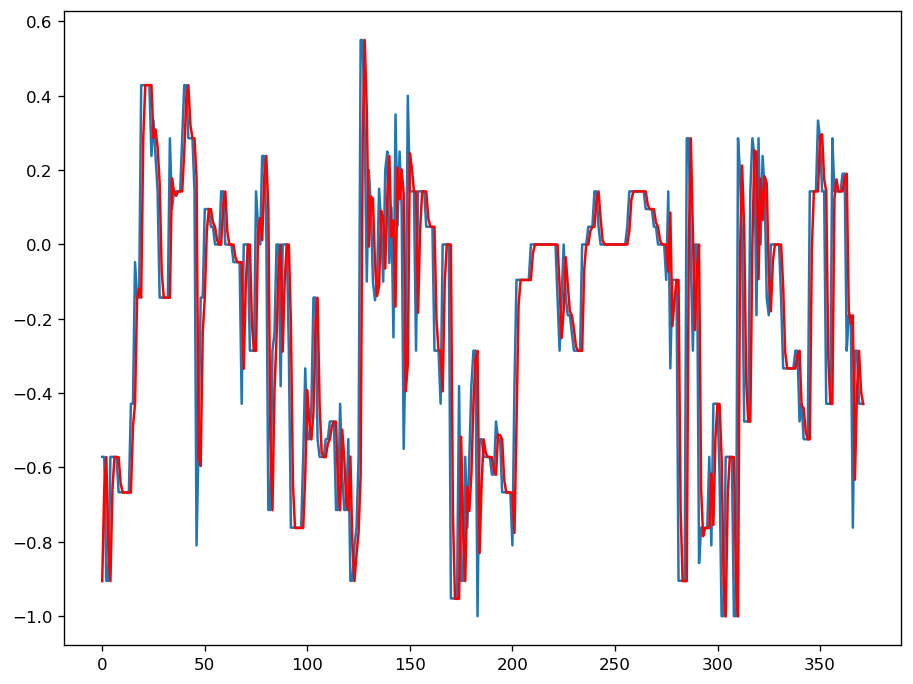

In [3]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

X = df.RSS_anchor4.values[0:1856]
size = int(len(X) * 0.8)
print(size)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
print(int((len(test))))
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
# print('Test: ' % len(test))
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

1484
372
predicted=-0.848667, expected=-0.571430
predicted=-0.647952, expected=-0.571430
predicted=-0.634176, expected=-0.904760
predicted=-0.833968, expected=-0.904760
predicted=-0.847287, expected=-0.571430
predicted=-0.647489, expected=-0.571430
predicted=-0.633906, expected=-0.571430
predicted=-0.622859, expected=-0.571430
predicted=-0.613834, expected=-0.666670
predicted=-0.666638, expected=-0.666670
predicted=-0.666960, expected=-0.666670
predicted=-0.667224, expected=-0.666670
predicted=-0.667440, expected=-0.666670
predicted=-0.667616, expected=-0.666670
predicted=-0.667761, expected=-0.428570
predicted=-0.517430, expected=-0.428570
predicted=-0.501548, expected=-0.047619
predicted=-0.247303, expected=-0.142860
predicted=-0.271272, expected=-0.142860
predicted=-0.247818, expected=0.428570
predicted=0.135624, expected=0.428570
predicted=0.192158, expected=0.428570
predicted=0.238461, expected=0.428570
predicted=0.276336, expected=0.428570
predicted=0.307050, expected=0.238100
pr

D:\AnacondaSoftware\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=-0.101122, expected=0.150000
predicted=0.063411, expected=0.050000
predicted=0.012329, expected=-0.100000
predicted=-0.079939, expected=0.200000
predicted=0.113539, expected=0.250000
predicted=0.161007, expected=-0.050000
predicted=-0.020699, expected=0.100000
predicted=0.072673, expected=-0.250000
predicted=-0.152122, expected=0.350000
predicted=0.223621, expected=0.050000
predicted=0.049384, expected=0.250000
predicted=0.179923, expected=0.100000
predicted=0.094092, expected=-0.550000
predicted=-0.329275, expected=-0.250000
predicted=-0.170891, expected=0.400000
predicted=0.238699, expected=0.142860
predicted=0.098658, expected=0.142860
predicted=0.106125, expected=0.142860
predicted=0.112330, expected=-0.285710
predicted=-0.161155, expected=0.142860
predicted=0.096061, expected=0.142860
predicted=0.103995, expected=0.142860
predicted=0.110578, expected=0.142860
predicted=0.116043, expected=0.047619
predicted=0.058773, expected=0.047619
predicted=0.056835, expected=0.047619

predicted=-0.463742, expected=-0.523810
predicted=-0.474028, expected=0.142860
predicted=-0.045197, expected=0.142860
predicted=-0.013585, expected=0.142860
predicted=0.012273, expected=0.142860
predicted=0.033751, expected=0.333330
predicted=0.177192, expected=0.285710
predicted=0.171735, expected=0.142860
predicted=0.096426, expected=0.142860
predicted=0.104147, expected=-0.428570
predicted=-0.266787, expected=-0.428570
predicted=-0.293681, expected=-0.428570
predicted=-0.315699, expected=0.285710
predicted=0.136550, expected=0.142860
predicted=0.066572, expected=0.142860
predicted=0.078859, expected=0.142860
predicted=0.089166, expected=0.142860
predicted=0.097819, expected=0.190480
predicted=0.136459, expected=0.190480
predicted=0.145200, expected=-0.285710
predicted=-0.161255, expected=-0.190480
predicted=-0.118670, expected=-0.190480
predicted=-0.130297, expected=-0.761900
predicted=-0.517023, expected=-0.285710
predicted=-0.242260, expected=-0.285710
predicted=-0.249388, expecte

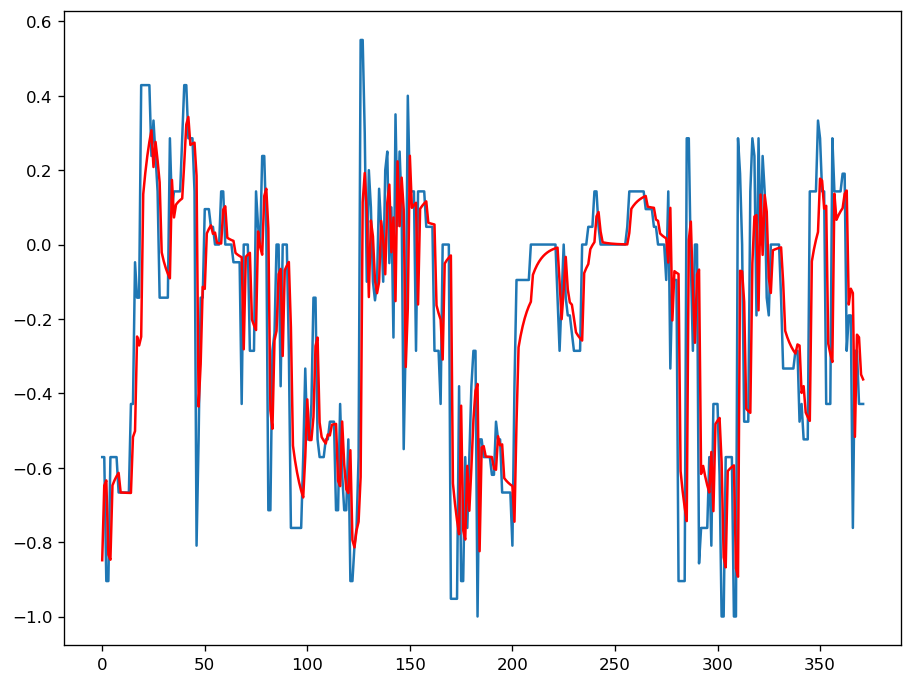

In [33]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

X = df.RSS_anchor4.values[0:1856]
size = int(len(X) * 0.8)
print(size)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
print(int((len(test))))
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

1484
372
predicted=-0.846744, expected=-0.571430
predicted=-0.646413, expected=-0.571430
predicted=-0.629569, expected=-0.904760
predicted=-0.830737, expected=-0.904760
predicted=-0.847244, expected=-0.571430
predicted=-0.647741, expected=-0.571430
predicted=-0.631661, expected=-0.571430
predicted=-0.621341, expected=-0.571430
predicted=-0.612953, expected=-0.666670
predicted=-0.666041, expected=-0.666670
predicted=-0.667361, expected=-0.666670
predicted=-0.667567, expected=-0.666670
predicted=-0.667718, expected=-0.666670
predicted=-0.667843, expected=-0.666670
predicted=-0.667946, expected=-0.428570
predicted=-0.518099, expected=-0.428570
predicted=-0.500579, expected=-0.047619
predicted=-0.247897, expected=-0.142860
predicted=-0.269368, expected=-0.142860
predicted=-0.248286, expected=0.428570
predicted=0.132992, expected=0.428570
predicted=0.193038, expected=0.428570
predicted=0.237519, expected=0.428570
predicted=0.274262, expected=0.428570
predicted=0.304623, expected=0.238100
pr

D:\AnacondaSoftware\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=0.160362, expected=-0.050000
predicted=-0.020854, expected=0.100000
predicted=0.069982, expected=-0.250000
predicted=-0.152940, expected=0.350000
predicted=0.219025, expected=0.050000
predicted=0.051366, expected=0.250000
predicted=0.177525, expected=0.100000
predicted=0.094200, expected=-0.550000
predicted=-0.329192, expected=-0.250000
predicted=-0.177797, expected=0.400000
predicted=0.237261, expected=0.142860
predicted=0.101086, expected=0.142860
predicted=0.106353, expected=0.142860
predicted=0.112295, expected=-0.285710
predicted=-0.160626, expected=0.142860
predicted=0.093364, expected=0.142860
predicted=0.104529, expected=0.142860
predicted=0.110848, expected=0.142860
predicted=0.116086, expected=0.047619
predicted=0.058823, expected=0.047619
predicted=0.056275, expected=0.047619
predicted=0.054803, expected=0.047619
predicted=0.053582, expected=-0.285710
predicted=-0.163162, expected=-0.285710
predicted=-0.185859, expected=-0.285710
predicted=-0.202432, expected=-0.42

predicted=0.032989, expected=0.333330
predicted=0.177417, expected=0.285710
predicted=0.171437, expected=0.142860
predicted=0.096771, expected=0.142860
predicted=0.105509, expected=-0.428570
predicted=-0.266543, expected=-0.428570
predicted=-0.291824, expected=-0.428570
predicted=-0.314926, expected=0.285710
predicted=0.138615, expected=0.142860
predicted=0.064646, expected=0.142860
predicted=0.078474, expected=0.142860
predicted=0.089090, expected=0.142860
predicted=0.097963, expected=0.190480
predicted=0.136823, expected=0.190480
predicted=0.145470, expected=-0.285710
predicted=-0.161506, expected=-0.190480
predicted=-0.116878, expected=-0.190480
predicted=-0.129625, expected=-0.761900
predicted=-0.517225, expected=-0.285710
predicted=-0.241141, expected=-0.285710
predicted=-0.249681, expected=-0.428570
predicted=-0.350003, expected=-0.428570
predicted=-0.362704, expected=-0.428570
Test MSE: 0.055
Test RMSE: 0.234


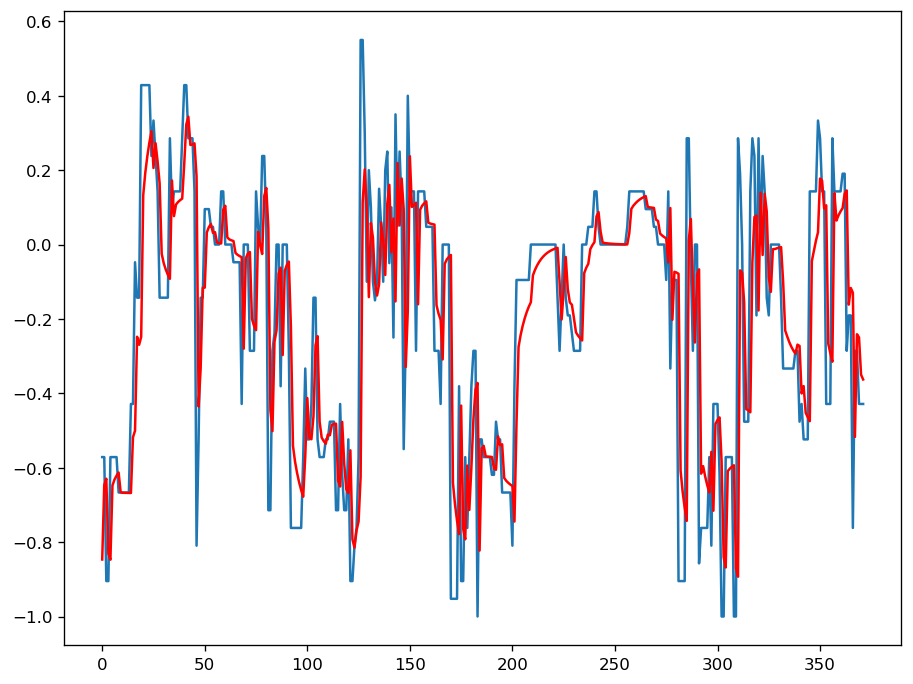

In [8]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

X = df.RSS_anchor4.values[0:1856]
size = int(len(X) * 0.8)
print(size)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
print(int((len(test))))
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# SARIMAX

In [3]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
import pmdarima as pm
SarimaxModel = pm.auto_arima(df.RSS_anchor4, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) 

print(SarimaxModel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-1730.450, Time=15.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=15782.097, Time=1.38 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1211.080, Time=12.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5685.313, Time=8.43 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=16162.456, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-1730.991, Time=6.05 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-1730.460, Time=20.13 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=44.46 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=7167.269, Time=3.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-1201.833, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-2033.537, Time=11.34 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-2033.683, Time=38.20 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=-2038.449, Time=114.65 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=-2021.516, Time=130.70 sec
 AR

In [11]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model = SARIMAX(df.RSS_anchor4 ,order=(5, 0, 5),
              seasonal_order=(2, 0, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()

In [26]:
resDiff = sm.tsa.arma_order_select_ic(df.RSS_anchor4, max_ar=7, max_ma=7, ic=["aic", "bic"], trend='nc')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')


ARMA(p,q) = (5, 4) is the best.


In [24]:
forecast = results.predict(start = len(df.RSS_anchor4) ,
                           end=len(df.RSS_anchor4)+1850,
                           typ='levels').rename('data sarimax (3,0,1) forecast')

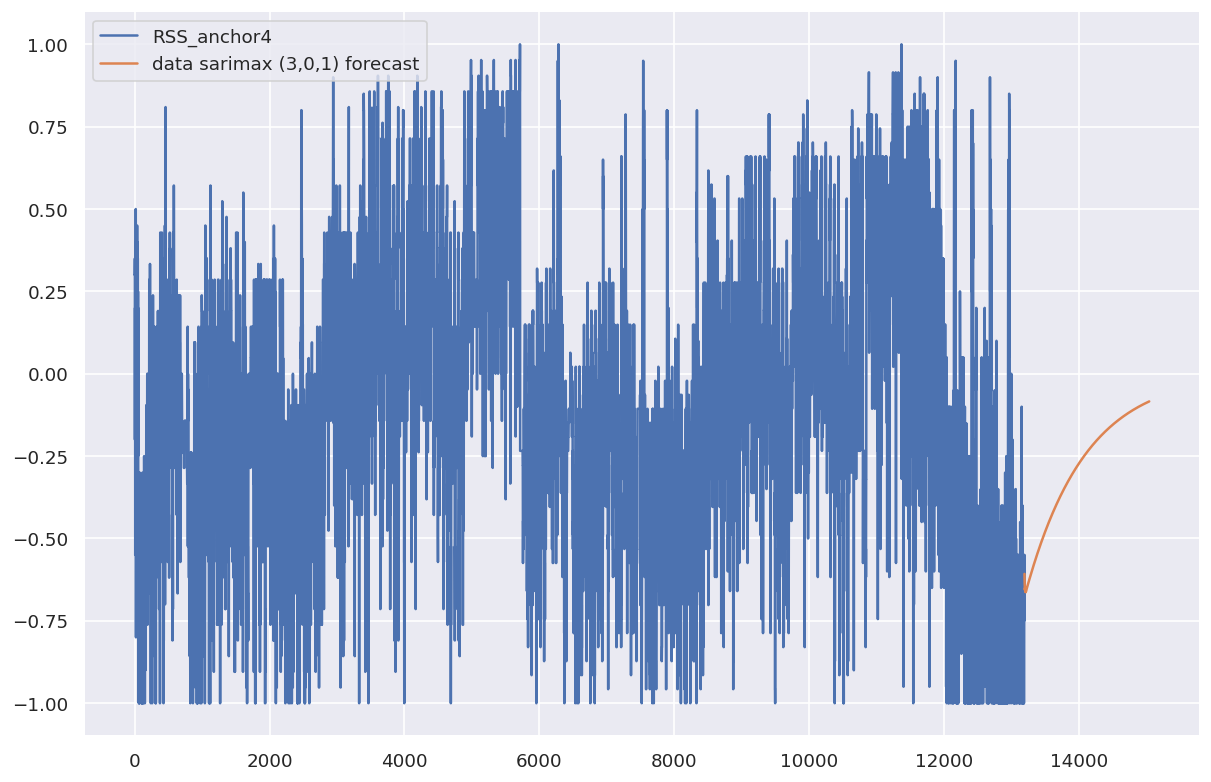

In [25]:
df.RSS_anchor4.plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)